In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/classify_data_3_emo_cla_prob_extra_topic_extendEmoDict_2_updateSTSC.csv')
data.shape

(30901, 41)

In [2]:
data = data[data['emo_prob_kw']!='-1']
T = data[data['label']=='LT'].append(data[data['label']=='HT'])
F = data[data['label']=='LF'].append(data[data['label']=='HF'])
HLT = data[data['label']=='LT'][data['followers_count']>=1000]
LHF = data[data['label']=='HF'][data['followers_count']<1000]
HLF = data[data['label']=='LF'][data['followers_count']>=1000]
L = data[data['label']=='LT'].append(data[data['label']=='LF'])
H = data[data['label']=='HT'].append(data[data['label']=='HF'])

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [3]:
import statsmodels.api as sm
def ecdf(data):
    return sm.distributions.ECDF(data)

In [4]:
import matplotlib.pyplot as plt
font1 = {
    'weight' : 'normal',
    'size'   : 18,
}
font2 = {
    'weight' : 'normal',
    'size'   : 14,
}
def plot_ccdf(news_list, emo, labels, colors, sname):
#     plt.style.use('seaborn-white')
    lab_dict = {'anger_avg':'Anger', 'disgust_avg':'Disgust', 'joy_avg':'Joy', 'sadness_avg':'Sadness', 'fear_avg':'Fear'}
    fig, ax = plt.subplots()
    for i in range(len(news_list)):
        ax.plot(np.arange(0,1.01,0.01), 
                1-ecdf(news_list[i][emo])(np.arange(0,1.01,0.01)), 
                label=labels[i], 
                color=colors[i],
                linewidth=3, 
                linestyle='-')
    ax.tick_params(labelsize=16, colors='black')
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(np.arange(0,1.2,0.2))
#     ax.set_xlabel('Proportion', font1, color='black')
    ax.set_xlabel(lab_dict[emo], font1, color='black')
    ax.set_ylabel('CCDF', font1, color='black')
    if emo == 'anger_kw':
        ax.legend(prop=font1, loc='upper center', ncol=2)
    plt.tight_layout()
    plt.savefig('images/'+ str(emo) +'_ccdf'+ str(sname)+ '.pdf')
    plt.savefig('images/'+ str(emo) +'_ccdf'+ str(sname)+ '.jpg', dpi=600)
    plt.show()

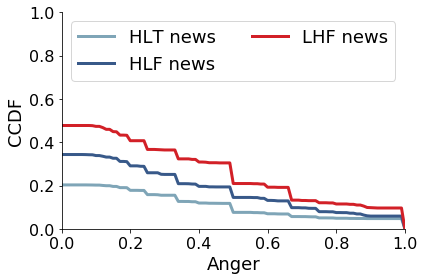

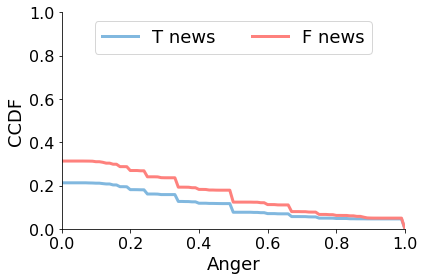

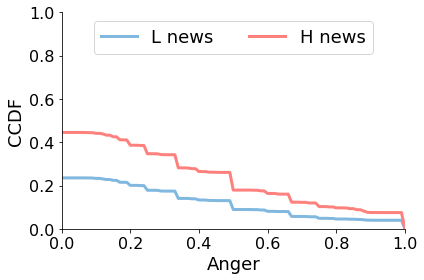

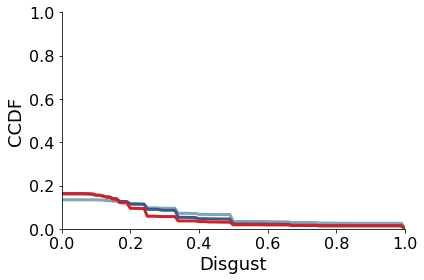

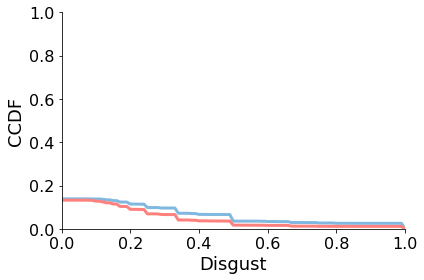

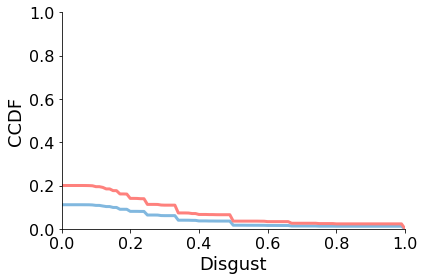

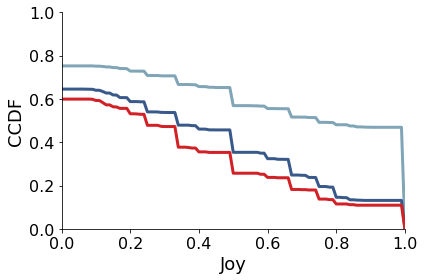

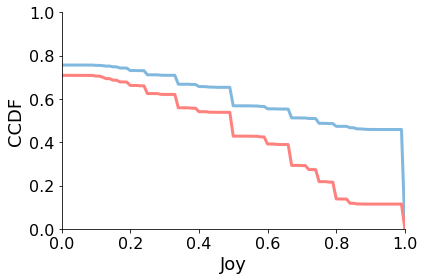

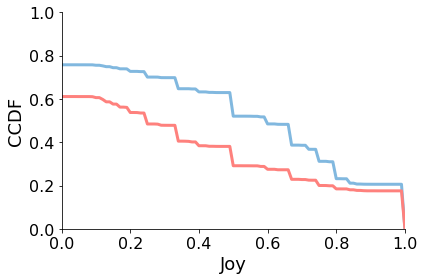

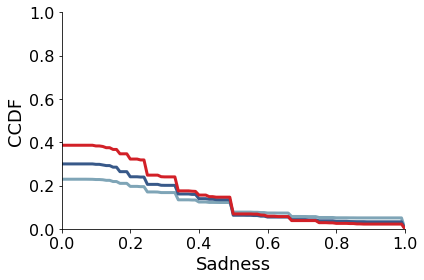

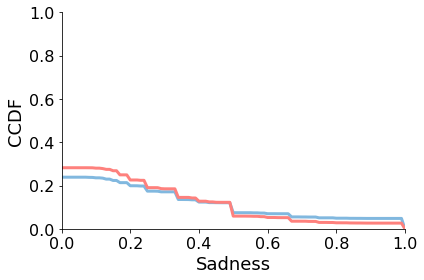

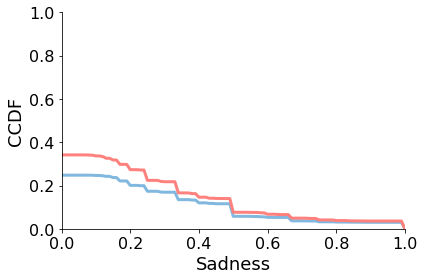

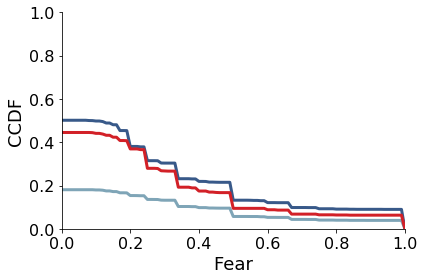

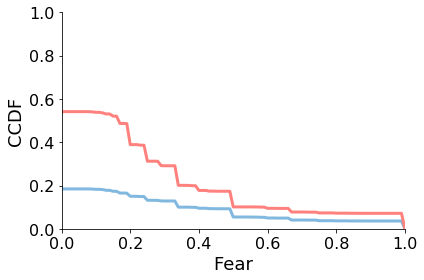

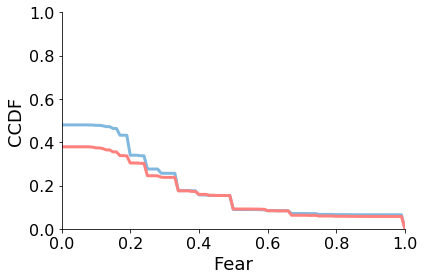

In [5]:
for emo in ['anger_kw', 'disgust_kw', 'joy_kw', 'sadness_kw', 'fear_kw']:
    plot_ccdf(news_list=[HLT, HLF, LHF], emo=emo, labels=['HLT news', 'HLF news', 'LHF news'], colors=['#7FA5B7', '#385989', '#D22027'], sname=1)
    plot_ccdf(news_list=[T, F], emo=emo, labels=['T news', 'F news'], colors=['#81B8DF', '#FE817D'], sname=2)
    plot_ccdf(news_list=[L, H], emo=emo, labels=['L news', 'H news'], colors=['#81B8DF', '#FE817D'], sname=3)